# **Loading the dataset**

In [1]:
# Loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("STRIKE_REPORTS.csv")

/tmp/ipython-input-3123998817.py:6: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("STRIKE_REPORTS.csv")


# ***Basic EDA***

In [2]:
print(df.info())
print(len(df.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               288810 non-null  int64  
 1   INCIDENT_DATE          288810 non-null  object 
 2   INCIDENT_MONTH         288810 non-null  int64  
 3   INCIDENT_YEAR          288810 non-null  int64  
 4   TIME                   163633 non-null  object 
 5   TIME_OF_DAY            166394 non-null  object 
 6   AIRPORT_ID             288804 non-null  object 
 7   AIRPORT                288810 non-null  object 
 8   LATITUDE               253309 non-null  float64
 9   LONGITUDE              253308 non-null  float64
 10  RUNWAY                 218852 non-null  object 
 11  STATE                  253309 non-null  object 
 12  FAAREGION              253309 non-null  object 
 13  LOCATION               33939 non-null   object 
 14  ENROUTE_STATE          5037 non-nul

There are 100 columns in this dataset, but many of them attribute to after effects of a bird strike, since we are more focused on only the features we can extract while a strike takes place, we will only consider those


In [3]:
print("Column number",df.columns)


Column number Index(['INDEX_NR', 'INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME',
       'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT', 'LATITUDE', 'LONGITUDE',
       'RUNWAY', 'STATE', 'FAAREGION', 'LOCATION', 'ENROUTE_STATE', 'OPID',
       'OPERATOR', 'REG', 'FLT', 'AIRCRAFT', 'AMA', 'AMO', 'EMA', 'EMO',
       'AC_CLASS', 'AC_MASS', 'TYPE_ENG', 'NUM_ENGS', 'ENG_1_POS', 'ENG_2_POS',
       'ENG_3_POS', 'ENG_4_POS', 'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED',
       'DISTANCE', 'SKY', 'PRECIPITATION', 'AOS', 'COST_REPAIRS', 'COST_OTHER',
       'COST_REPAIRS_INFL_ADJ', 'COST_OTHER_INFL_ADJ', 'INGESTED_OTHER',
       'INDICATED_DAMAGE', 'DAMAGE_LEVEL', 'STR_RAD', 'DAM_RAD',
       'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE', 'STR_ENG1',
       'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', 'ING_ENG2', 'STR_ENG3',
       'DAM_ENG3', 'ING_ENG3', 'STR_ENG4', 'DAM_ENG4', 'ING_ENG4', 'STR_PROP',
       'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE',
       'S

# **Filtering out the unnecessary columns**

In [4]:
# List of columns to keep
# based on our research and filtering out columns that talk about after effects

columns_to_keep = [
    # Target variable
    'DAMAGE_LEVEL',

    # Temporal
    'INCIDENT_MONTH',
    'INCIDENT_YEAR',
    'TIME_OF_DAY',

    # Location
    'LATITUDE',
    'LONGITUDE',

    # Aircraft Characteristics
    "AIRCRAFT",
    'TYPE_ENG',
    'NUM_ENGS',

    # Flight Conditions
    'PHASE_OF_FLIGHT',
    'HEIGHT',
    'SPEED',
    'DISTANCE',
    'SKY',
    'PRECIPITATION',

    # Wildlife Characteristics
    'NUM_STRUCK',
    'SIZE',
]

df = df[columns_to_keep]

In [5]:
df.info()
# we have 17 columns remaining

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DAMAGE_LEVEL     187315 non-null  object 
 1   INCIDENT_MONTH   288810 non-null  int64  
 2   INCIDENT_YEAR    288810 non-null  int64  
 3   TIME_OF_DAY      166394 non-null  object 
 4   LATITUDE         253309 non-null  float64
 5   LONGITUDE        253308 non-null  float64
 6   AIRCRAFT         288810 non-null  object 
 7   TYPE_ENG         206044 non-null  object 
 8   NUM_ENGS         206259 non-null  float64
 9   PHASE_OF_FLIGHT  177843 non-null  object 
 10  HEIGHT           148807 non-null  float64
 11  SPEED            94237 non-null   float64
 12  DISTANCE         188234 non-null  float64
 13  SKY              139382 non-null  object 
 14  PRECIPITATION    11175 non-null   object 
 15  NUM_STRUCK       288174 non-null  object 
 16  SIZE             263538 non-null  obje

In [6]:
# finding the null values
df.isna().sum()

,0
DAMAGE_LEVEL,101495
INCIDENT_MONTH,0
INCIDENT_YEAR,0
TIME_OF_DAY,122416
LATITUDE,35501
LONGITUDE,35502
AIRCRAFT,0
TYPE_ENG,82766
NUM_ENGS,82551
PHASE_OF_FLIGHT,110967


# **Removing null values**

In [7]:
# Calculating the percentage of null values for each column: we will be removing all columns that have more than 70% null values
null_percentage = (df.isnull().sum() / len(df)) * 100

# Columns with their null percentages
print("Null percentage by column:")
print(null_percentage.sort_values(ascending=False))
print("\n" + "="*50 + "\n")

# Identifying columns to drop (more than 70% null)
columns_to_drop = null_percentage[null_percentage > 70].index.tolist()

print(f"Columns to drop (>70% null): {columns_to_drop}")
print(f"Number of columns to drop: {len(columns_to_drop)}\n")

# Dropping those columns
df_filtered = df.drop(columns=columns_to_drop)

print(f"Remaining columns: {df.columns.tolist()}")
print(f"Number of remaining columns: {len(df.columns)}")

Null percentage by column:
PRECIPITATION      96.130674
SPEED              67.370590
SKY                51.739206
HEIGHT             48.475815
TIME_OF_DAY        42.386344
PHASE_OF_FLIGHT    38.422146
DAMAGE_LEVEL       35.142481
DISTANCE           34.824279
TYPE_ENG           28.657595
NUM_ENGS           28.583152
LONGITUDE          12.292511
LATITUDE           12.292164
SIZE                8.750390
NUM_STRUCK          0.220214
AIRCRAFT            0.000000
INCIDENT_YEAR       0.000000
INCIDENT_MONTH      0.000000
dtype: float64


Columns to drop (>70% null): ['PRECIPITATION']
Number of columns to drop: 1

Remaining columns: ['DAMAGE_LEVEL', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME_OF_DAY', 'LATITUDE', 'LONGITUDE', 'AIRCRAFT', 'TYPE_ENG', 'NUM_ENGS', 'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED', 'DISTANCE', 'SKY', 'PRECIPITATION', 'NUM_STRUCK', 'SIZE']
Number of remaining columns: 17


In [8]:
df_filtered.isna().sum()

,0
DAMAGE_LEVEL,101495
INCIDENT_MONTH,0
INCIDENT_YEAR,0
TIME_OF_DAY,122416
LATITUDE,35501
LONGITUDE,35502
AIRCRAFT,0
TYPE_ENG,82766
NUM_ENGS,82551
PHASE_OF_FLIGHT,110967


In [9]:
# removing all remaining rows where values are null
df_filtered.dropna(how="any",inplace=True)

In [10]:
df_filtered.isna().sum()

,0
DAMAGE_LEVEL,0
INCIDENT_MONTH,0
INCIDENT_YEAR,0
TIME_OF_DAY,0
LATITUDE,0
LONGITUDE,0
AIRCRAFT,0
TYPE_ENG,0
NUM_ENGS,0
PHASE_OF_FLIGHT,0


In [11]:
df_filtered["DAMAGE_LEVEL"].value_counts()

,count
DAMAGE_LEVEL,
N,40410
M,1778
M?,1767
S,1100
D,11


In [12]:
len(df_filtered.columns)
df_filtered.to_csv("cleaned_dataset.csv")

In [13]:
len(df_filtered)

45066

In [14]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45066 entries, 5 to 288804
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DAMAGE_LEVEL     45066 non-null  object 
 1   INCIDENT_MONTH   45066 non-null  int64  
 2   INCIDENT_YEAR    45066 non-null  int64  
 3   TIME_OF_DAY      45066 non-null  object 
 4   LATITUDE         45066 non-null  float64
 5   LONGITUDE        45066 non-null  float64
 6   AIRCRAFT         45066 non-null  object 
 7   TYPE_ENG         45066 non-null  object 
 8   NUM_ENGS         45066 non-null  float64
 9   PHASE_OF_FLIGHT  45066 non-null  object 
 10  HEIGHT           45066 non-null  float64
 11  SPEED            45066 non-null  float64
 12  DISTANCE         45066 non-null  float64
 13  SKY              45066 non-null  object 
 14  NUM_STRUCK       45066 non-null  object 
 15  SIZE             45066 non-null  object 
dtypes: float64(6), int64(2), object(8)
memory usage: 5.8+ MB


In [15]:
df_filtered.isna().sum()

,0
DAMAGE_LEVEL,0
INCIDENT_MONTH,0
INCIDENT_YEAR,0
TIME_OF_DAY,0
LATITUDE,0
LONGITUDE,0
AIRCRAFT,0
TYPE_ENG,0
NUM_ENGS,0
PHASE_OF_FLIGHT,0


# **Grouping Damage level classes**

In [16]:
# grouping "M" and "M?" to a single category M and "S" and "D" to a full category S_D, and "N" as a separate category to balance out classes and convert this to a 3 class prblem
mapping = {
    "N":"N",
    "M": "M",
    "M?": "M",
    "S": "S_D",
    "D": "S_D"
}
df_filtered["DAMAGE_LEVEL_GROUPED"] = df_filtered["DAMAGE_LEVEL"].map(mapping)

In [17]:
df_filtered["DAMAGE_LEVEL_GROUPED"].value_counts()

,count
DAMAGE_LEVEL_GROUPED,
N,40410
M,3545
S_D,1111


In [18]:
df_filtered["DAMAGE_LEVEL"].value_counts()

,count
DAMAGE_LEVEL,
N,40410
M,1778
M?,1767
S,1100
D,11


In [19]:
df_filtered["AIRCRAFT"].value_counts()

,count
AIRCRAFT,
B-737-700,4847
B-737-800,2758
B-737-300,2561
A-320,1972
CRJ100/200,1803
...,...
HAWKER-SDLY HS748,1
ZIVKO?EDGE 540,1
EMB LEGACY 450/500,1


# **Grouping aircrafts from the same family**

In [20]:
#creating a separate AIRCRAFT FAMILY variable, which will act as a categorical variable
def aircraft_family(x):
    x = str(x).upper()
    if 'B-737' in x or 'B-757' in x or 'B-747' in x:
        return 'Boeing'
    elif 'A-' in x or 'A3' in x or 'A3' in x:
        return 'Airbus'
    elif 'EMB' in x:
        return 'Embraer'
    elif 'C-' in x and 'C-172' not in x:
        return 'Cessna'
    elif 'UNKNOWN' in x:
        return 'UNKNOWN'
    else:
        return 'Other'

df_filtered['AIRCRAFT_FAMILY'] = df_filtered['AIRCRAFT'].apply(aircraft_family)

In [21]:
df_filtered.head()

,DAMAGE_LEVEL,INCIDENT_MONTH,INCIDENT_YEAR,TIME_OF_DAY,LATITUDE,LONGITUDE,AIRCRAFT,TYPE_ENG,NUM_ENGS,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,NUM_STRUCK,SIZE,DAMAGE_LEVEL_GROUPED,AIRCRAFT_FAMILY
5,N,5,1991,Day,29.53369,-98.46978,B-727-100,D,3.0,Take-off Run,0.0,100.0,0.0,No Cloud,1,Medium,N,Other
11,N,9,1990,Day,33.36996,-81.96450,DC-9,D,2.0,Landing Roll,0.0,100.0,0.0,No Cloud,2-10,Small,N,Cessna
13,N,12,1993,Day,32.89595,-97.03720,MD-11,D,3.0,Landing Roll,0.0,120.0,0.0,Overcast,1,Small,N,Other
16,N,7,1990,Day,33.94254,-118.40807,MD-80,D,2.0,Landing Roll,0.0,125.0,0.0,Some Cloud,1,Small,N,Other
19,N,5,1990,Day,41.78598,-87.75242,B-737,D,2.0,Landing Roll,0.0,100.0,0.0,Overcast,1,Medium,N,Boeing


In [22]:
df_filtered.isna().sum()

,0
DAMAGE_LEVEL,0
INCIDENT_MONTH,0
INCIDENT_YEAR,0
TIME_OF_DAY,0
LATITUDE,0
LONGITUDE,0
AIRCRAFT,0
TYPE_ENG,0
NUM_ENGS,0
PHASE_OF_FLIGHT,0


In [23]:
df_filtered["AIRCRAFT_FAMILY"].value_counts()

,count
AIRCRAFT_FAMILY,
Other,17293
Boeing,14180
Airbus,6787
Embraer,3581
Cessna,3225


In [24]:
df_filtered["DAMAGE_LEVEL_GROUPED"].value_counts()

,count
DAMAGE_LEVEL_GROUPED,
N,40410
M,3545
S_D,1111


In [25]:
#there are 18 columns remaining
len(df_filtered.columns)

18

In [26]:
df_filtered.columns

Index(['DAMAGE_LEVEL', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME_OF_DAY',
       'LATITUDE', 'LONGITUDE', 'AIRCRAFT', 'TYPE_ENG', 'NUM_ENGS',
       'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED', 'DISTANCE', 'SKY', 'NUM_STRUCK',
       'SIZE', 'DAMAGE_LEVEL_GROUPED', 'AIRCRAFT_FAMILY'],
      dtype='object')

In [27]:
# we remove the aircraft column, so now we have 17 columns
df_filtered.drop(columns="AIRCRAFT",inplace=True)

In [28]:
# checking if num_struck is a categorical value (Yes it is)
df_filtered["NUM_STRUCK"].value_counts()

,count
NUM_STRUCK,
1,36627
2-10,7892
11-100,529
More than 100,18


In [29]:
df_filtered.columns

Index(['DAMAGE_LEVEL', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME_OF_DAY',
       'LATITUDE', 'LONGITUDE', 'TYPE_ENG', 'NUM_ENGS', 'PHASE_OF_FLIGHT',
       'HEIGHT', 'SPEED', 'DISTANCE', 'SKY', 'NUM_STRUCK', 'SIZE',
       'DAMAGE_LEVEL_GROUPED', 'AIRCRAFT_FAMILY'],
      dtype='object')

In [30]:
df_filtered["DAMAGE_LEVEL_GROUPED"].value_counts()

,count
DAMAGE_LEVEL_GROUPED,
N,40410
M,3545
S_D,1111


# **Downsampling of majority classes**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Determine the target
target = "DAMAGE_LEVEL_GROUPED"

# Separating each class
df_N = df_filtered[df_filtered[target] == "N"]
df_M = df_filtered[df_filtered[target] == "M"]
df_SD = df_filtered[df_filtered[target] == "S_D"]

# Determining min size to upsample minority classes or downsample majority
min_size = min(len(df_N), len(df_M), len(df_SD))

# using min-size to downsample
df_N_balanced = resample(df_N, replace=False, n_samples=min_size, random_state=42)
df_M_balanced = resample(df_M, replace=True, n_samples=min_size, random_state=42)
df_SD_balanced = resample(df_SD, replace=True, n_samples=min_size, random_state=42)

# Combining all three classes to single data frame back
df_balanced = pd.concat([df_N_balanced, df_M_balanced, df_SD_balanced])

# Shuffling dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Features and target
features = [
    'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME_OF_DAY',
    'LATITUDE', 'LONGITUDE', 'TYPE_ENG', 'NUM_ENGS',
    'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED', 'DISTANCE',
    'SKY', 'NUM_STRUCK', 'SIZE', 'AIRCRAFT_FAMILY'
]

X = df_balanced[features]
y = df_balanced[target]

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Balanced class counts in training set:\n", y_train.value_counts())


Balanced class counts in training set:
 DAMAGE_LEVEL_GROUPED
N      889
M      889
S_D    888
Name: count, dtype: int64


# **Base Logistic Regression**

Accuracy: 0.6086956521739131

Classification Report:
               precision    recall  f1-score   support

           M       0.54      0.46      0.50       222
           N       0.64      0.77      0.70       222
         S_D       0.63      0.60      0.62       223

    accuracy                           0.61       667
   macro avg       0.60      0.61      0.60       667
weighted avg       0.60      0.61      0.60       667



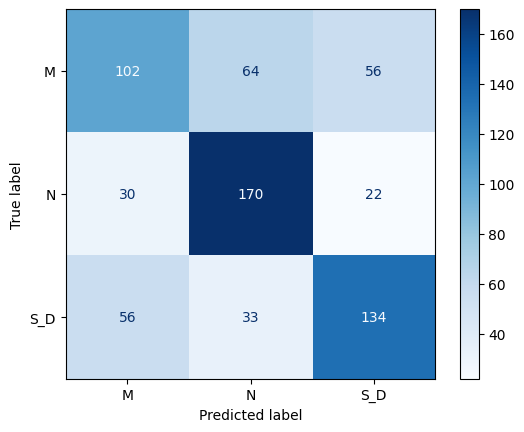

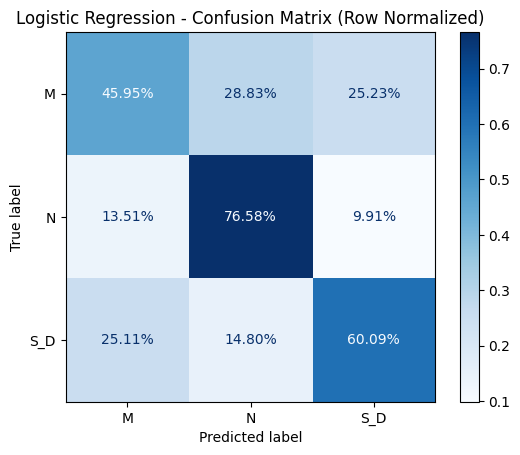

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Defining features BEFORE creating engineered ones
numeric_features = [
    'INCIDENT_YEAR', 'LATITUDE', 'LONGITUDE',
    'NUM_ENGS', 'HEIGHT', 'SPEED', 'DISTANCE'
]

categorical_features = [
    'TIME_OF_DAY', 'TYPE_ENG', 'PHASE_OF_FLIGHT',
    'SKY', 'SIZE', 'AIRCRAFT_FAMILY',
    'NUM_STRUCK', 'INCIDENT_MONTH'
]

# Preprocessing: Standard scaler for numerics,
numeric_transformer = StandardScaler()
# One-hot encoding for categoricals
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Defining pipeline (step 1: preprocessing, step 2: model)
log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("log_reg", LogisticRegression(
        solver="lbfgs",
        max_iter=5000,
        class_weight="balanced",
        random_state=42
    ))
])

# Train-test split
X = df_balanced[numeric_features + categorical_features]
y = df_balanced[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train model
log_reg_pipeline.fit(X_train, y_train)

# Evaluate
y_pred = log_reg_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_pipeline.classes_)
disp.plot(cmap="Blues", values_format="d")

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=log_reg_pipeline.classes_)
disp_norm.plot(cmap="Blues", values_format=".2%")
plt.title("Logistic Regression - Confusion Matrix (Row Normalized)")
plt.show()



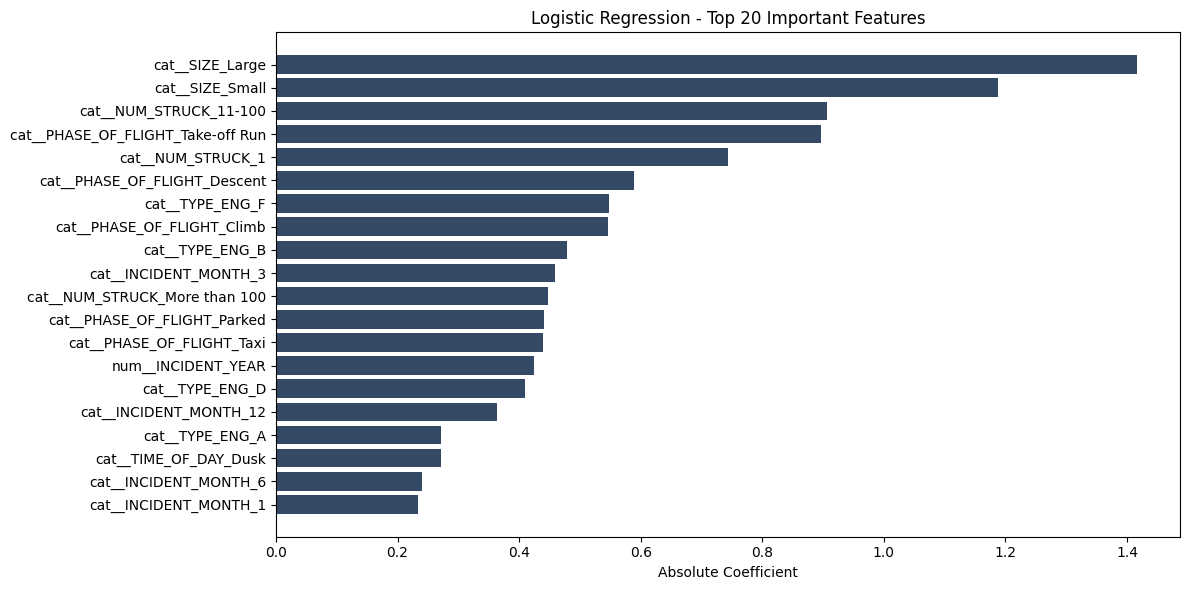

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get final feature names from preprocessor
feature_names = (
    log_reg_pipeline.named_steps["preprocessor"]
    .get_feature_names_out(numeric_features + categorical_features)
)

# Get coefficients
log_reg = log_reg_pipeline.named_steps["log_reg"]
coef_df = pd.DataFrame(log_reg.coef_, columns=feature_names, index=log_reg.classes_)

# Take max absolute coefficient across classes for each feature
coef_max = coef_df.apply(lambda row: row.iloc[np.argmax(np.abs(row))], axis=0)

# Create DataFrame with absolute values
feature_importance_df = pd.DataFrame({
    "Feature": coef_max.index,
    "Coefficient": coef_max.values,
    "Abs_Coefficient": np.abs(coef_max.values)
})

# Sort by absolute coefficient
feature_importance_df = feature_importance_df.sort_values(by="Abs_Coefficient", ascending=False)

# Top 20
top20 = feature_importance_df.head(20)

# Plot
plt.figure(figsize=(12,6))
plt.barh(top20["Feature"], top20["Abs_Coefficient"], color="#344966")
plt.gca().invert_yaxis()
plt.xlabel("Absolute Coefficient")
plt.title("Logistic Regression - Top 20 Important Features")
plt.tight_layout()
plt.show()


# **CART base model**

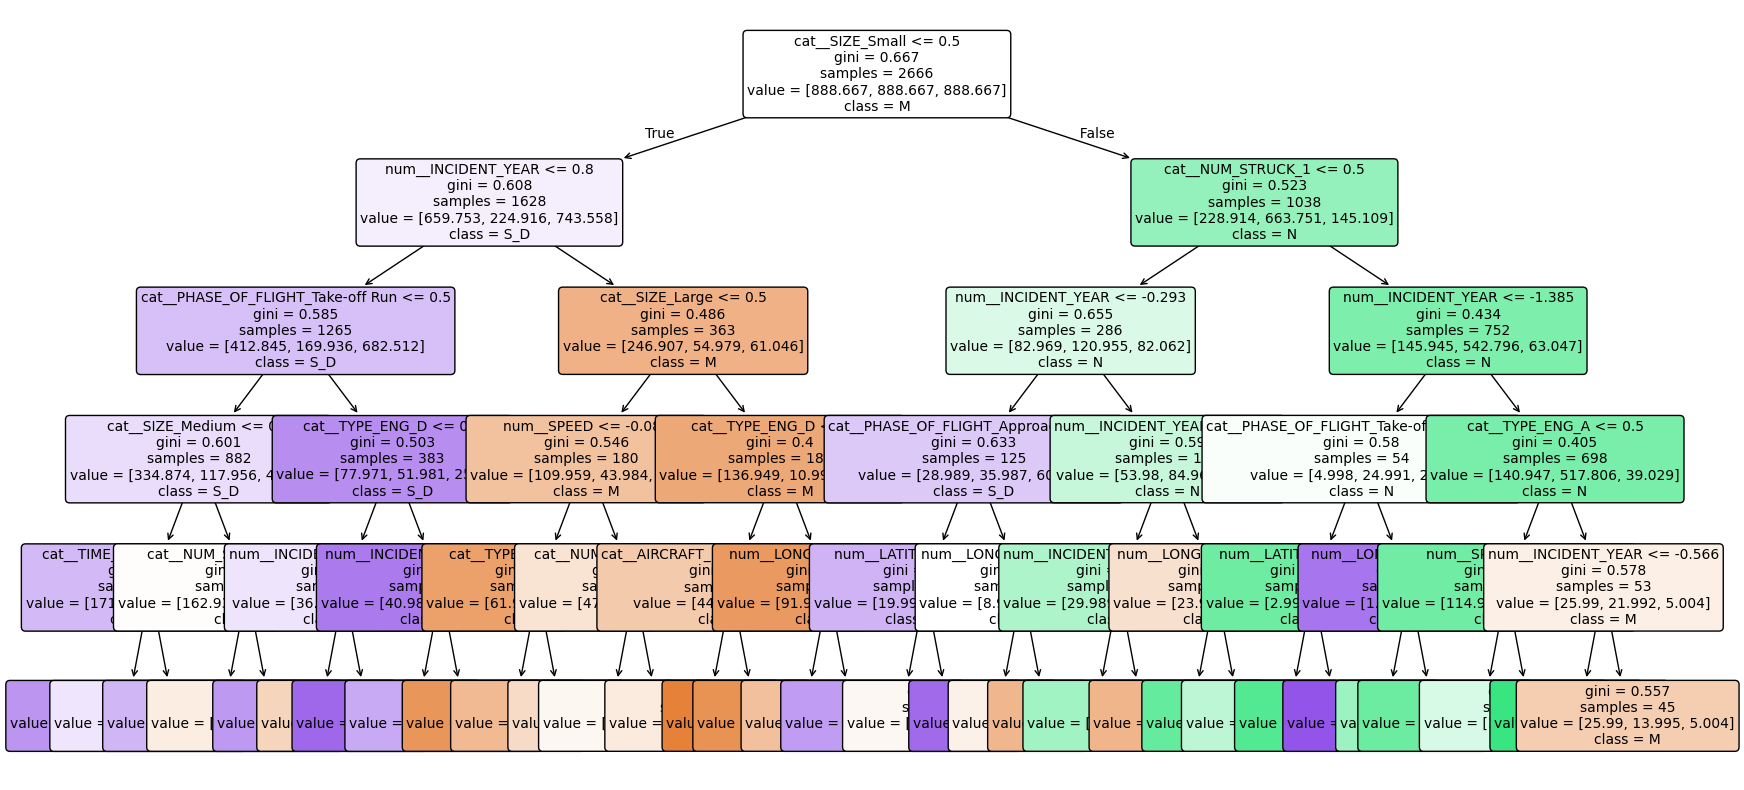

Accuracy: 0.5817091454272864

Classification Report:
               precision    recall  f1-score   support

           M       0.48      0.44      0.46       222
           N       0.66      0.63      0.64       222
         S_D       0.60      0.68      0.64       223

    accuracy                           0.58       667
   macro avg       0.58      0.58      0.58       667
weighted avg       0.58      0.58      0.58       667



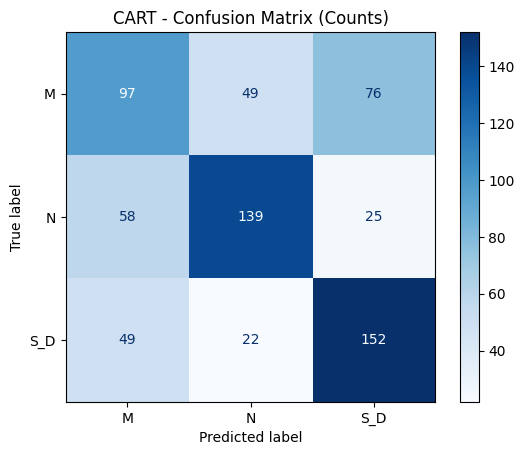

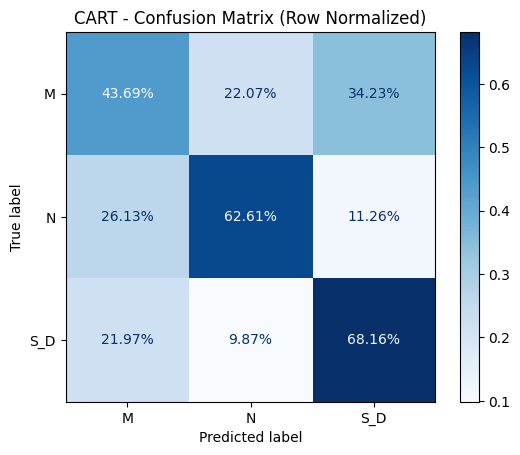

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

# -----------------------------
# 1️⃣ Define Features
# -----------------------------
numeric_features = [
    'INCIDENT_YEAR', 'LATITUDE', 'LONGITUDE',
    'NUM_ENGS', 'HEIGHT', 'SPEED', 'DISTANCE'
]

categorical_features = [
    'TIME_OF_DAY', 'TYPE_ENG', 'PHASE_OF_FLIGHT',
    'SKY', 'SIZE', 'AIRCRAFT_FAMILY',
    'NUM_STRUCK', 'INCIDENT_MONTH'
]

# -----------------------------
# 2. Preprocessor
# -----------------------------
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# -----------------------------
# 3. CART Model
# -----------------------------
cart = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42
)

# -----------------------------
# 4. Pipeline
# -----------------------------
cart_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("cart", cart)
])

# -----------------------------
# 5. Train-Test Split
# -----------------------------
X = df_balanced[numeric_features + categorical_features]
y = df_balanced[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 6. Train + Predict
# -----------------------------
cart_pipeline.fit(X_train, y_train)
y_pred = cart_pipeline.predict(X_test)

# 7. printing the tree
fitted_cart = cart_pipeline.named_steps["cart"]
feature_names = cart_pipeline.named_steps["preprocessor"].get_feature_names_out()

plt.figure(figsize=(20, 10))
tree.plot_tree(
    fitted_cart,
    feature_names=feature_names,
    class_names=[str(c) for c in fitted_cart.classes_],  # convert safely to string list
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


# -----------------------------
# 8. Evaluation
# -----------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# 9.Confusion Matrices
# -----------------------------
# Standard confusion matrix (counts)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cart_pipeline.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("CART - Confusion Matrix (Counts)")
plt.show()

# Row-normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=cart_pipeline.classes_)
disp_norm.plot(cmap="Blues", values_format=".2%")
plt.title("CART - Confusion Matrix (Row Normalized)")
plt.show()


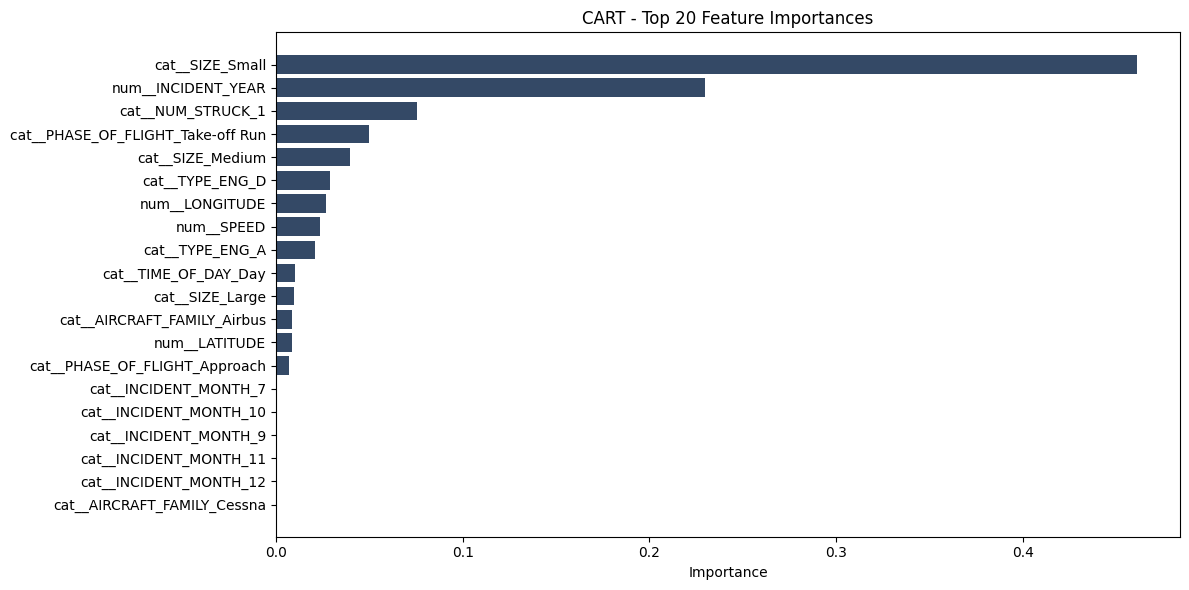

Top 20 Important Features (CART):

                              Feature  Importance
0                     cat__SIZE_Small    0.461007
1                  num__INCIDENT_YEAR    0.229905
2                   cat__NUM_STRUCK_1    0.075421
3   cat__PHASE_OF_FLIGHT_Take-off Run    0.050038
4                    cat__SIZE_Medium    0.039892
5                     cat__TYPE_ENG_D    0.028923
6                      num__LONGITUDE    0.026729
7                          num__SPEED    0.023614
8                     cat__TYPE_ENG_A    0.020714
9                cat__TIME_OF_DAY_Day    0.010336
10                    cat__SIZE_Large    0.009415
11        cat__AIRCRAFT_FAMILY_Airbus    0.008823
12                      num__LATITUDE    0.008390
13      cat__PHASE_OF_FLIGHT_Approach    0.006793
14              cat__INCIDENT_MONTH_7    0.000000
15             cat__INCIDENT_MONTH_10    0.000000
16              cat__INCIDENT_MONTH_9    0.000000
17             cat__INCIDENT_MONTH_11    0.000000
18             

In [35]:
# Extract the fitted Decision Tree model
cart_model = cart_pipeline.named_steps["cart"]

# Get transformed feature names from the preprocessor
feature_names = cart_pipeline.named_steps["preprocessor"].get_feature_names_out(
    numeric_features + categorical_features
)

# Match feature importances to correct names
importances = cart_model.feature_importances_
indices = np.argsort(importances)[::-1]

feature_importance_df = pd.DataFrame({
    "Feature": feature_names[indices],
    "Importance": importances[indices]
})

# Top 20
top20 = feature_importance_df.head(20)

# Plot
plt.figure(figsize=(12,6))
plt.barh(top20["Feature"], top20["Importance"], color="#344966")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("CART - Top 20 Feature Importances")
plt.tight_layout()
plt.show()

print("Top 20 Important Features (CART):\n")
print(top20)


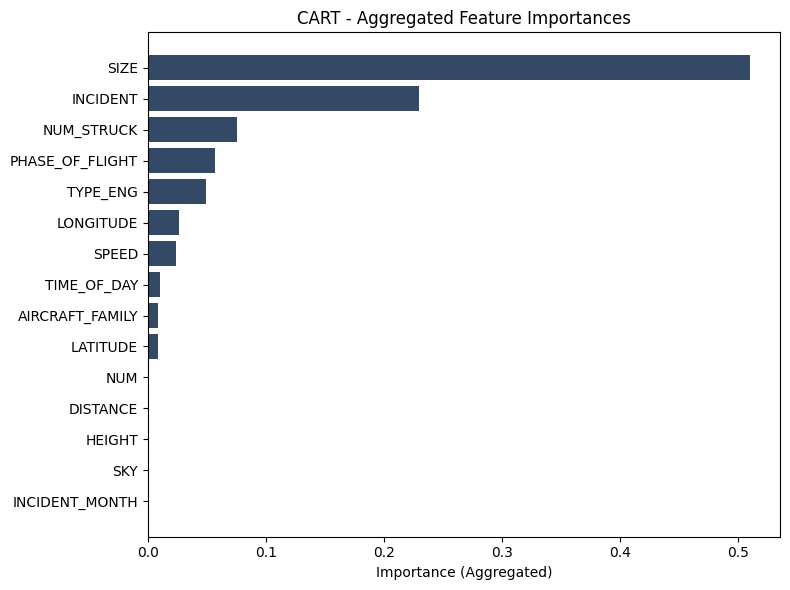


Top Aggregated Feature Importances:

            Feature  Total_Importance
11             SIZE          0.510314
0          INCIDENT          0.229905
13       NUM_STRUCK          0.075421
9   PHASE_OF_FLIGHT          0.056831
8          TYPE_ENG          0.049637
2         LONGITUDE          0.026729
5             SPEED          0.023614
7       TIME_OF_DAY          0.010336
12  AIRCRAFT_FAMILY          0.008823
1          LATITUDE          0.008390


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Get feature importances
# -----------------------------
ohe = cart_pipeline.named_steps["preprocessor"].named_transformers_["cat"]
ohe_features = list(ohe.get_feature_names_out(categorical_features))
all_features = numeric_features + ohe_features

importances = cart_pipeline.named_steps["cart"].feature_importances_

feat_imp = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
})

# -----------------------------
# Aggregate OHE features back to base categorical feature
# -----------------------------
agg_importance = {}

for feature in feat_imp["Feature"]:
    #base = feature.split("_")[0]  # get original column name before first "_"
    base= feature.rsplit("_", 1)[0]
    agg_importance[base] = agg_importance.get(base, 0) + feat_imp.loc[feat_imp["Feature"] == feature, "Importance"].values[0]

# Combine into dataframe
agg_df = pd.DataFrame(list(agg_importance.items()), columns=["Feature", "Total_Importance"])
agg_df = agg_df.sort_values(by="Total_Importance", ascending=False)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(8,6))
plt.barh(agg_df["Feature"].head(15)[::-1], agg_df["Total_Importance"].head(15)[::-1],color="#344966")
plt.title("CART - Aggregated Feature Importances")
plt.xlabel("Importance (Aggregated)")
plt.tight_layout()
plt.show()

# -----------------------------
# Print clean table
# -----------------------------
print("\nTop Aggregated Feature Importances:\n")
print(agg_df.head(10))


CART Classification Report:

              precision    recall  f1-score   support

           M      0.540     0.581     0.560       222
           N      0.647     0.586     0.615       222
         S_D      0.665     0.677     0.671       223

    accuracy                          0.615       667
   macro avg      0.617     0.615     0.615       667
weighted avg      0.617     0.615     0.615       667



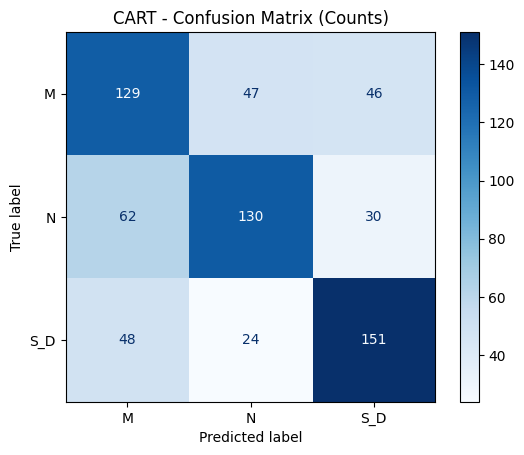

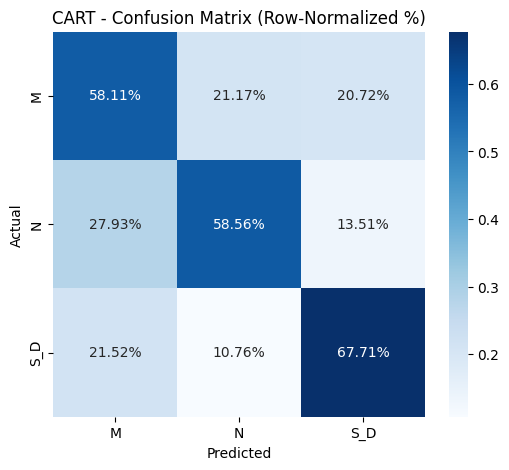

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# -----------------------------
# 1. Preprocessing (reuse numeric + categorical features)
# -----------------------------
# Assuming numeric_features and categorical_features are defined from previous cells
numeric_features = [
    'INCIDENT_YEAR', 'LATITUDE', 'LONGITUDE',
    'NUM_ENGS', 'HEIGHT', 'SPEED', 'DISTANCE'
]

categorical_features = [
    'TIME_OF_DAY', 'TYPE_ENG', 'PHASE_OF_FLIGHT',
    'SKY', 'SIZE', 'AIRCRAFT_FAMILY',
    'NUM_STRUCK', 'INCIDENT_MONTH'
]


numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# -----------------------------
# 2.CART classifier
# -----------------------------
cart = DecisionTreeClassifier(
    criterion='gini',    # classic CART uses Gini impurity
    max_depth=None,      # you can limit depth to prevent overfitting
    min_samples_leaf=5,  # helps reduce overfitting
    class_weight="balanced",
    random_state=42
)

# -----------------------------
# 3.Pipeline
# -----------------------------
pipeline_cart = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", cart)
])

# -----------------------------
# 4.Train
# -----------------------------
# Need to encode y_train for training if it's not already
# Assuming y_train is the original string labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test) # Encode test labels as well

pipeline_cart.fit(X_train, y_train_encoded)

# -----------------------------
# 5. Evaluate
# -----------------------------
y_pred_encoded = pipeline_cart.predict(X_test)
y_pred_labels = le.inverse_transform(y_pred_encoded) # Decode predictions

print("CART Classification Report:\n")
print(classification_report(y_test, y_pred_labels, digits=3)) # Use original y_test and decoded predictions


# Confusion Matrix (Absolute Counts)
cm_cart = confusion_matrix(y_test, y_pred_labels, labels=le.classes_) # Use original labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cart, display_labels=le.classes_) # Use original labels
disp.plot(cmap="Blues", values_format="d")
plt.title("CART - Confusion Matrix (Counts)")
plt.show()

# Confusion Matrix (Row-Normalized %)
cm_cart_percent = cm_cart.astype('float') / cm_cart.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6,5))
sns.heatmap(cm_cart_percent, annot=True, fmt=".2%", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_) # Use original labels
plt.title("CART - Confusion Matrix (Row-Normalized %)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Random Forest base pipeline**

Accuracy: 0.6761619190404797

Classification Report:
               precision    recall  f1-score   support

           M       0.63      0.50      0.56       222
           N       0.68      0.74      0.71       222
         S_D       0.71      0.78      0.74       223

    accuracy                           0.68       667
   macro avg       0.67      0.68      0.67       667
weighted avg       0.67      0.68      0.67       667



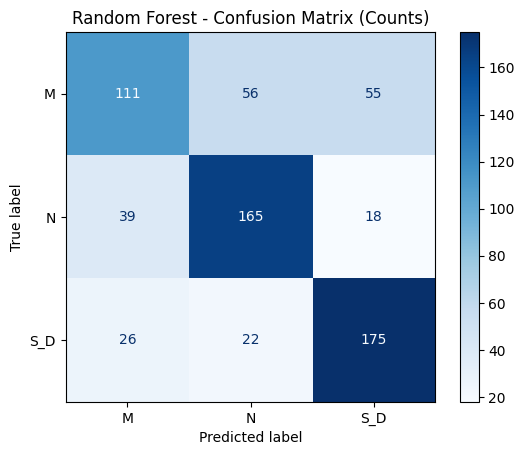

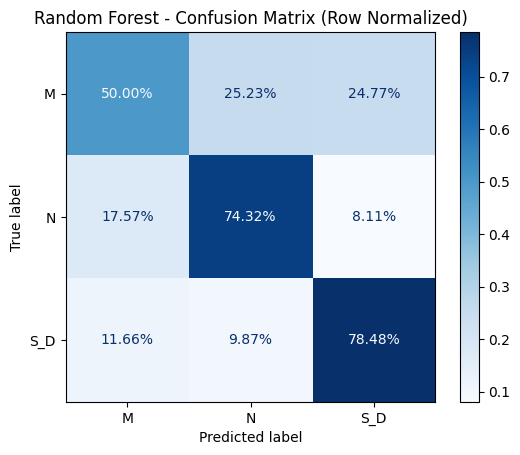


Classification Report with threshold tuning (S_D threshold=0.3):

              precision    recall  f1-score   support

           M      0.657     0.311     0.422       222
           N      0.691     0.725     0.708       222
         S_D      0.596     0.879     0.710       223

    accuracy                          0.639       667
   macro avg      0.648     0.638     0.613       667
weighted avg      0.648     0.639     0.613       667



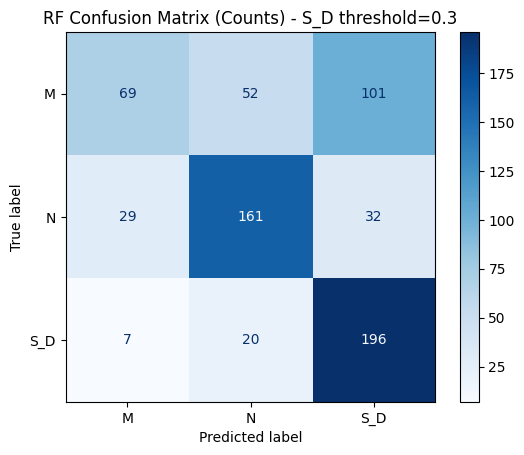

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Features (same as you provided)
# -----------------------------
numeric_features = [
    'INCIDENT_YEAR', 'LATITUDE', 'LONGITUDE',
    'NUM_ENGS', 'HEIGHT', 'SPEED', 'DISTANCE'
]

categorical_features = [
    'TIME_OF_DAY', 'TYPE_ENG', 'PHASE_OF_FLIGHT',
    'SKY', 'SIZE', 'AIRCRAFT_FAMILY',
    'NUM_STRUCK', 'INCIDENT_MONTH'
]

# -----------------------------
# Preprocessor + Model + Pipeline
# -----------------------------
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("rf", rf)
])

# -----------------------------
# Train-test split
# -----------------------------
X = df_balanced[numeric_features + categorical_features]
y = df_balanced[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# Train + Predict
# -----------------------------
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

# -----------------------------
# Basic evaluation
# -----------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# Confusion matrix (counts)
# -----------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_pipeline.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Random Forest - Confusion Matrix (Counts)")
plt.show()

# -----------------------------
# Row-normalized confusion matrix (safe against zero-row sums)
# -----------------------------
row_sums = cm.sum(axis=1)[:, np.newaxis]
row_sums_safe = np.where(row_sums == 0, 1, row_sums)   # avoid division by zero
cm_normalized = cm.astype('float') / row_sums_safe

disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=rf_pipeline.classes_)
disp_norm.plot(cmap="Blues", values_format=".2%")
plt.title("Random Forest - Confusion Matrix (Row Normalized)")
plt.show()

# ===============================
# Threshold tuning (make S_D more likely)
# ===============================
y_proba = rf_pipeline.predict_proba(X_test)
classes = np.array(rf_pipeline.classes_)   # ensure numpy array for indexing

# make sure 'S_D' exists
if "S_D" not in classes:
    raise ValueError(f"Class 'S_D' not found in pipeline classes: {classes}")

sd_idx = np.where(classes == "S_D")[0][0]
threshold = 0.3

# baseline = argmax predictions
preds_baseline = classes[np.argmax(y_proba, axis=1)].copy()

# override: where S_D prob > threshold, set to S_D
preds_thresh = preds_baseline.copy()
preds_thresh[y_proba[:, sd_idx] > threshold] = "S_D"

print(f"\nClassification Report with threshold tuning (S_D threshold={threshold}):\n")
print(classification_report(y_test, preds_thresh, digits=3))

# optional: show confusion matrix for thresholded predictions
cm_thresh = confusion_matrix(y_test, preds_thresh, labels=classes)
disp_thresh = ConfusionMatrixDisplay(confusion_matrix=cm_thresh, display_labels=classes)
disp_thresh.plot(cmap="Blues", values_format="d")
plt.title(f"RF Confusion Matrix (Counts) - S_D threshold={threshold}")
plt.show()


In [39]:
# here overall accuracy is compormised but almost all S_D are caught, but very poor results for M and N classes is caught

# **XGBoost base pipeline**

Accuracy: 0.7181409295352323

Classification Report:
               precision    recall  f1-score   support

           M      0.663     0.604     0.632       222
           N      0.727     0.743     0.735       222
         S_D      0.756     0.807     0.781       223

    accuracy                          0.718       667
   macro avg      0.716     0.718     0.716       667
weighted avg      0.716     0.718     0.716       667



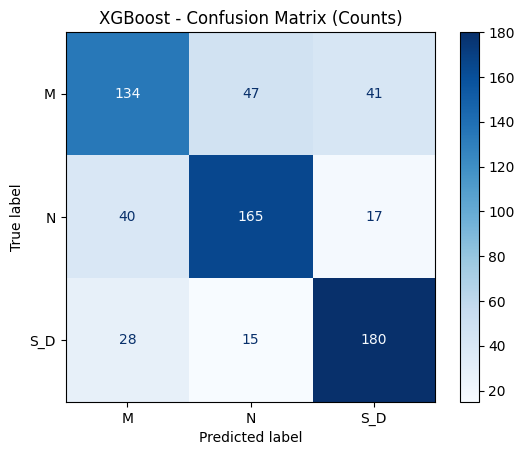

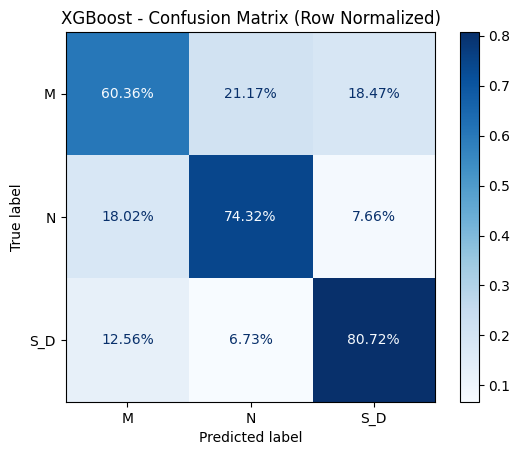

In [40]:
# ======================================
# XGBoost Pipeline with Label Encoding Fix
# ======================================

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Features
# -----------------------------
numeric_features = [
    'INCIDENT_YEAR', 'LATITUDE', 'LONGITUDE',
    'NUM_ENGS', 'HEIGHT', 'SPEED', 'DISTANCE'
]

categorical_features = [
    'TIME_OF_DAY', 'TYPE_ENG', 'PHASE_OF_FLIGHT',
    'SKY', 'SIZE', 'AIRCRAFT_FAMILY',
    'NUM_STRUCK', 'INCIDENT_MONTH'
]

# -----------------------------
# Preprocessor
# -----------------------------
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# -----------------------------
# XGBoost Model
# -----------------------------
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    objective="multi:softprob",
    random_state=42,
    n_jobs=-1
)

# -----------------------------
# Encode Target Labels
# -----------------------------
le = LabelEncoder()

X = df_balanced[numeric_features + categorical_features]
y = df_balanced[target]

# Convert categorical labels ('M', 'N', 'S_D') → integers (0, 1, 2)
y_encoded = le.fit_transform(y)

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# -----------------------------
# Pipeline
# -----------------------------
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("xgb", xgb)
])

# -----------------------------
# Train + Predict
# -----------------------------
xgb_pipeline.fit(X_train, y_train)
y_pred_encoded = xgb_pipeline.predict(X_test)

# Decode numeric predictions back to original class labels
y_pred = le.inverse_transform(y_pred_encoded)
y_test_labels = le.inverse_transform(y_test)

# -----------------------------
# Evaluation
# -----------------------------
print("Accuracy:", accuracy_score(y_test_labels, y_pred))
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred, digits=3))

# -----------------------------
# Confusion matrix (Counts)
# -----------------------------
cm = confusion_matrix(y_test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("XGBoost - Confusion Matrix (Counts)")
plt.show()

# -----------------------------
# Row-normalized confusion matrix (with safe division)
# -----------------------------
row_sums = cm.sum(axis=1)[:, np.newaxis]
row_sums_safe = np.where(row_sums == 0, 1, row_sums)  # avoid division by zero
cm_normalized = cm.astype('float') / row_sums_safe

disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=le.classes_)
disp_norm.plot(cmap="Blues", values_format=".2%")
plt.title("XGBoost - Confusion Matrix (Row Normalized)")
plt.show()


# **Additional Feature Engineering**

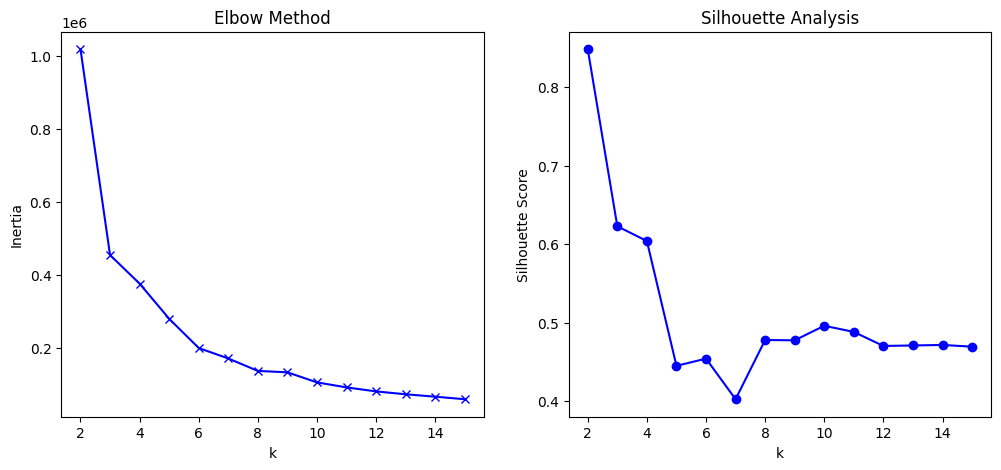

Best K (Silhouette): 2


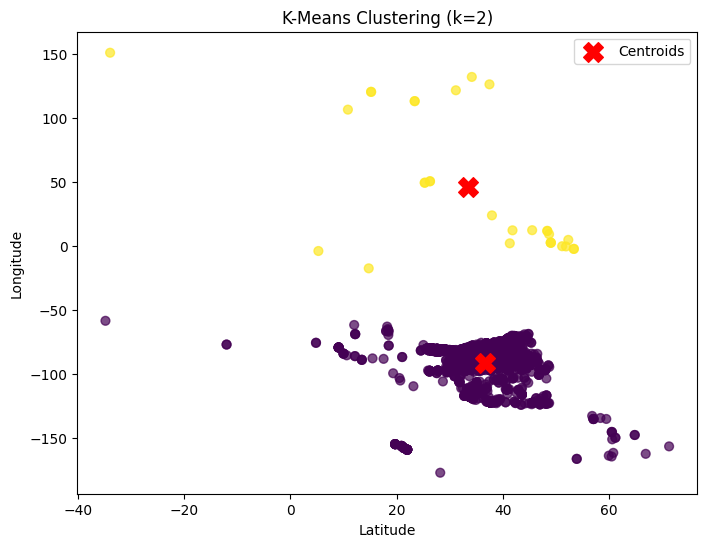

In [41]:
# First we are finding Finding Optimal value for k (no. of clusters)
# -----------------------------
# -----------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def find_optimal_k(X, max_k=15):
    inertia = []
    silhouette_scores = []
    K = range(2, max_k+1)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, labels))

    # Plot elbow (inertia)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')

    # Plot silhouette
    plt.subplot(1,2,2)
    plt.plot(K, silhouette_scores, 'bo-')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')

    plt.show()

    # Return the k with highest silhouette score
    best_k = K[np.argmax(silhouette_scores)]
    print(f"Best K (Silhouette): {best_k}")
    return best_k

# Run only once to decide k
best_k = find_optimal_k(X_train[['LATITUDE','LONGITUDE']], max_k=15)

# -----------------------------
# Fit final KMeans and plot clusters
# -----------------------------
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans_final.fit_predict(X_train[['LATITUDE','LONGITUDE']])
centroids = kmeans_final.cluster_centers_

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X_train['LATITUDE'], X_train['LONGITUDE'], c=labels, cmap='viridis', s=40, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title(f"K-Means Clustering (k={best_k})")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()

Elbow method also shows the elbow somewhere close to 2 and stiluette score is also highest for 2 clusters, which is why we decided to use only two clusters.

# **Cart Results to Random Forest**

/tmp/ipython-input-4014895164.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['HEIGHT'].fillna(median_height_airborne, inplace=True)
/tmp/ipython-input-4014895164.py:84: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True


Random Forest Classification Report (Feature-Engineered + CART Features):

              precision    recall  f1-score   support

           M      0.675     0.635     0.654       222
           N      0.718     0.770     0.743       222
         S_D      0.805     0.794     0.799       223

    accuracy                          0.733       667
   macro avg      0.733     0.733     0.732       667
weighted avg      0.733     0.733     0.732       667



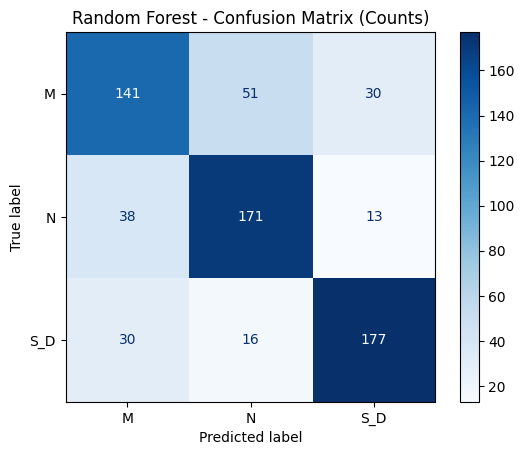

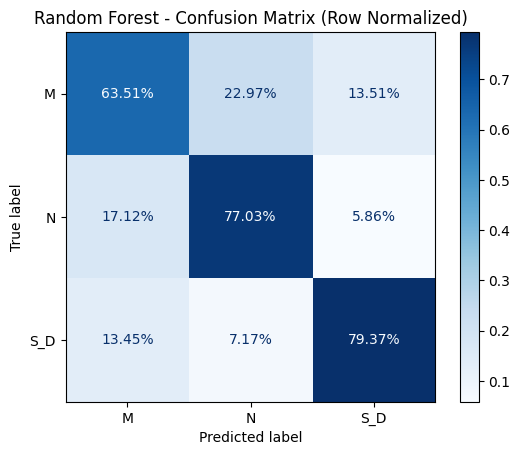

In [42]:
# ======================================
# Random Forest with Feature-Engineered Features from CART (Fixed)
# ======================================

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1.Select top features from CART (Using user-defined lists)
# -----------------------------
top_numeric = ['INCIDENT_YEAR', 'LATITUDE', 'LONGITUDE', 'SPEED', 'HEIGHT', 'DISTANCE'] # Included DISTANCE here
top_categorical = ['SIZE', 'PHASE_OF_FLIGHT', 'TYPE_ENG', 'AIRCRAFT_FAMILY', 'SKY', 'TIME_OF_DAY', 'NUM_STRUCK', 'INCIDENT_MONTH'] # Included INCIDENT_MONTH here

# Combine features needed for engineering
features_for_engineering = list(set(top_numeric + top_categorical)) # Use set to avoid duplicates

# -----------------------------
# 2.Feature Engineering
# -----------------------------
def feature_engineering(df, best_k=3):
    X = df.copy()

    # Ensure required columns are present for engineering
    required_cols = ['SPEED', 'HEIGHT', 'DISTANCE', 'INCIDENT_MONTH', 'LATITUDE', 'LONGITUDE', 'PHASE_OF_FLIGHT']
    for col in required_cols:
        if col not in X.columns:
            # Add missing columns with default values if necessary, or handle appropriately
            if col in ['SPEED', 'HEIGHT', 'DISTANCE']:
                 X[col] = 0.0 # Or some other suitable default/imputation
            elif col in ['INCIDENT_MONTH']:
                 X[col] = 1 # Default month
            elif col in ['LATITUDE', 'LONGITUDE']:
                 X[col] = 0.0 # Default location
            elif col in ['PHASE_OF_FLIGHT']:
                X[col] = 'UNKNOWN' # Default phase


    # Numeric interactions (ensure required columns are available after potential adding)
    X['SPEED_HEIGHT'] = X['SPEED'] * X['HEIGHT']
    X['DIST_SPEED_RATIO'] = X['DISTANCE'] / (X['SPEED'] + 1e-5) # Add a small epsilon to avoid division by zero


    # Cyclic transformation for month
    X['MONTH_SIN'] = np.sin(2 * np.pi * X['INCIDENT_MONTH'] / 12)
    X['MONTH_COS'] = np.cos(2 * np.pi * X['INCIDENT_MONTH'] / 12)

    # Cluster based on location (ensure LATITUDE and LONGITUDE are available)
    if 'LATITUDE' in X.columns and 'LONGITUDE' in X.columns:
        kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10) # Explicitly set n_init
        # Handle potential NaNs or Infs in LATITUDE/LONGITUDE before clustering
        X_loc = X[['LATITUDE', 'LONGITUDE']].replace([np.inf, -np.inf], np.nan).fillna(X[['LATITUDE', 'LONGITUDE']].median())
        X['LOCATION_CLUSTER'] = kmeans.fit_predict(X_loc)
    else:
        X['LOCATION_CLUSTER'] = 0 # Default cluster if location data is missing


    # Replace HEIGHT=0 with median for airborne phases
    airborne_phases = ['Climb', 'Descent', 'Approach']
    # Calculate median only from relevant non-zero heights in the training data context
    median_height_airborne = X.loc[X['PHASE_OF_FLIGHT'].isin(airborne_phases) & (X['HEIGHT'] > 0), 'HEIGHT'].median()
    # If median_height_airborne is NaN (e.g., no airborne strikes with height > 0), use global non-zero median or 0
    if np.isnan(median_height_airborne):
        median_height_airborne = X.loc[X['HEIGHT'] > 0, 'HEIGHT'].median() if X.loc[X['HEIGHT'] > 0, 'HEIGHT'].median() is not np.nan else 0.0

    X.loc[X['PHASE_OF_FLIGHT'].isin(airborne_phases) & (X['HEIGHT'] == 0), 'HEIGHT'] = median_height_airborne
    # Handle remaining NaNs in HEIGHT if any after the first step
    X['HEIGHT'].fillna(median_height_airborne, inplace=True)


    # Ensure all engineered columns are numeric or suitable for OHE
    # Convert infinite values to NaN and then handle NaNs
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    # Simple median imputation for engineered numeric features if NaNs were introduced
    engineered_numeric_cols = ['SPEED_HEIGHT', 'DIST_SPEED_RATIO', 'MONTH_SIN', 'MONTH_COS']
    for col in engineered_numeric_cols:
         if col in X.columns:
            X[col].fillna(X[col].median(), inplace=True)


    return X[features_for_engineering + engineered_numeric_cols + ['LOCATION_CLUSTER']] # Return only the relevant features


# -----------------------------
# Encode Target Labels and Split
# -----------------------------
target = 'DAMAGE_LEVEL_GROUPED'

le = LabelEncoder()
y_encoded = le.fit_transform(df_balanced[target]) # Use the original balanced dataframe for target

# Apply Feature Engineering BEFORE splitting using only the selected features
X_selected = df_balanced[features_for_engineering].copy() # Select only the features for engineering
X_fe = feature_engineering(X_selected, best_k=best_k) # Use the best_k from previous step


# -----------------------------
# Train-test split
# -----------------------------
X_train_fe, X_test_fe, y_train_encoded, y_test_encoded = train_test_split(
    X_fe, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# -----------------------------
# 5.Preprocessing (Define based on engineered features)
# -----------------------------
# Update numeric and categorical features list based on the output of feature_engineering
numeric_features_fe = X_train_fe.select_dtypes(include=np.number).columns.tolist()
categorical_features_fe = X_train_fe.select_dtypes(exclude=np.number).columns.tolist()


numeric_transformer = StandardScaler()
# Handle potential new categorical features from clustering or other engineering
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features_fe),
    ('cat', categorical_transformer, categorical_features_fe)
])

# -----------------------------
# 6.Random Forest Model
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# -----------------------------
# 7.Train Model
# -----------------------------
pipeline_rf.fit(X_train_fe, y_train_encoded)

# -----------------------------
# 8.Predict
# -----------------------------
y_pred_encoded = pipeline_rf.predict(X_test_fe)

# Decode numeric labels back to original text labels
y_pred = le.inverse_transform(y_pred_encoded)
y_test_labels = le.inverse_transform(y_test_encoded) # Decode test labels for comparison

# -----------------------------
# 9.Evaluate
# -----------------------------
print("\nRandom Forest Classification Report (Feature-Engineered + CART Features):\n")
print(classification_report(y_test_labels, y_pred, digits=3))

# -----------------------------
# Confusion Matrices
# -----------------------------
cm = confusion_matrix(y_test_labels, y_pred, labels=le.classes_) # Use original labels for display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest - Confusion Matrix (Counts)")
plt.show()

# Row-normalized confusion matrix
row_sums = cm.sum(axis=1)[:, np.newaxis]
row_sums_safe = np.where(row_sums == 0, 1, row_sums)
cm_normalized = cm.astype('float') / row_sums_safe

disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=le.classes_)
disp_norm.plot(cmap='Blues', values_format=".2%")
plt.title("Random Forest - Confusion Matrix (Row Normalized)")
plt.show()

# **CART results to Logistic Regression**

Accuracy: 0.600

Logistic Regression (CART+ Feature Engineered) - Classification Report:

              precision    recall  f1-score   support

           M      0.519     0.441     0.477       222
           N      0.630     0.743     0.682       222
         S_D      0.634     0.614     0.624       223

    accuracy                          0.600       667
   macro avg      0.594     0.600     0.594       667
weighted avg      0.594     0.600     0.594       667



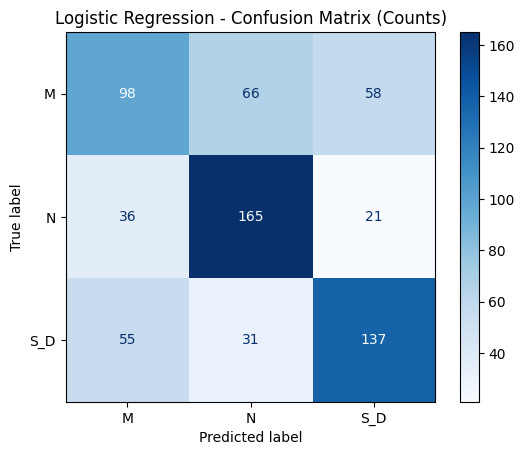

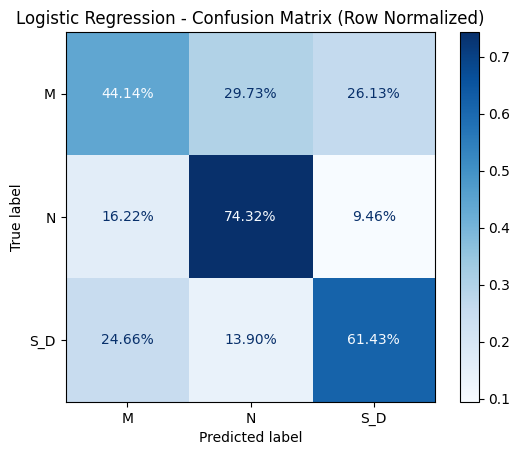

In [43]:
# =========================================
# Logistic Regression Pipeline with CART Features (Fully Fixed)
# =========================================

import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.model_selection import train_test_split

# -----------------------------
# Suppress harmless warnings
# -----------------------------
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# -----------------------------
# Feature Engineering (already applied from CART)
# -----------------------------
numeric_features = top_numeric + ['SPEED_HEIGHT', 'MONTH_SIN', 'MONTH_COS', 'DIST_SPEED_RATIO']
categorical_features = top_categorical + ['LOCATION_CLUSTER']

# Apply Feature Engineering BEFORE splitting
X_fe = feature_engineering(X, best_k=best_k)  # use CART-selected features

# -----------------------------
# Encode target labels and split
# -----------------------------
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # encode original labels (M, N, S_D → 0, 1, 2)

X_train_fe, X_test_fe, y_train_encoded, y_test_encoded = train_test_split(
    X_fe, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# -----------------------------
# Preprocessor
# -----------------------------
numeric_features_fe = X_train_fe.select_dtypes(include=np.number).columns.tolist()
categorical_features_fe = X_train_fe.select_dtypes(exclude=np.number).columns.tolist()

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features_fe),
    ('cat', categorical_transformer, categorical_features_fe)
])

# -----------------------------
# Logistic Regression Model
# -----------------------------
logreg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

pipeline_lg = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', logreg)
])

# -----------------------------
# Train
# -----------------------------
pipeline_lg.fit(X_train_fe, y_train_encoded)

# -----------------------------
# Predict
# -----------------------------
y_pred_encoded = pipeline_lg.predict(X_test_fe)

# Decode predictions and test labels for readable output
y_pred_labels = le.inverse_transform(y_pred_encoded)
y_test_labels = le.inverse_transform(y_test_encoded)

# -----------------------------
# Evaluation
# -----------------------------
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy: {accuracy:.3f}")

print("\nLogistic Regression (CART+ Feature Engineered) - Classification Report:\n")
print(classification_report(
    y_test_labels,
    y_pred_labels,
    labels=le.classes_,         # ensure correct order (M, N, S_D)
    target_names=le.classes_,   # original labels as names
    digits=3
))

# -----------------------------
# Confusion Matrix (Counts)
# -----------------------------
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Logistic Regression - Confusion Matrix (Counts)")
plt.show()

# -----------------------------
# Row-normalized confusion matrix
# -----------------------------
row_sums = cm.sum(axis=1)[:, np.newaxis]
row_sums_safe = np.where(row_sums == 0, 1, row_sums)  # avoid divide by zero
cm_normalized = cm.astype('float') / row_sums_safe

disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=le.classes_)
disp_norm.plot(cmap="Blues", values_format=".2%")
plt.title("Logistic Regression - Confusion Matrix (Row Normalized)")
plt.show()


# **Using CART results for XG Boost**

Accuracy: 0.7106446776611695

Classification Report:

              precision    recall  f1-score   support

           M      0.631     0.608     0.619       222
           N      0.739     0.752     0.746       222
         S_D      0.758     0.771     0.764       223

    accuracy                          0.711       667
   macro avg      0.709     0.711     0.710       667
weighted avg      0.709     0.711     0.710       667



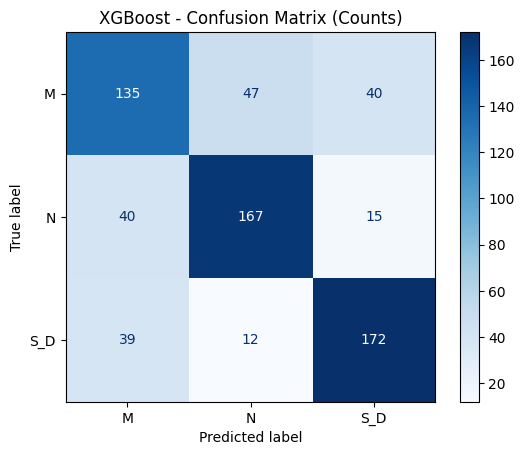

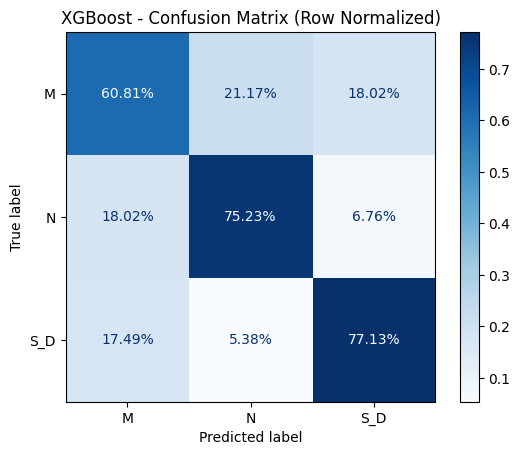

In [44]:
# =========================================
# XGBoost Pipeline with CART Features (Fully Fixed)
# =========================================

import numpy as np
import matplotlib.pyplot as plt
import warnings
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.model_selection import train_test_split # Import train_test_split

# -----------------------------
# Suppress harmless warnings
# -----------------------------
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# -----------------------------
# Feature Engineering (using the function defined previously)
# -----------------------------
# Assuming df_balanced and feature_engineering function are available from previous cells
numeric_features = top_numeric + ['SPEED_HEIGHT', 'MONTH_SIN', 'MONTH_COS','DIST_SPEED_RATIO']
categorical_features = top_categorical + ['LOCATION_CLUSTER']

# Apply Feature Engineering BEFORE splitting
X_fe = feature_engineering(X, best_k=best_k) # Use the best_k from previous step

# -----------------------------
# Encode target labels and split
# -----------------------------
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train_fe, X_test_fe, y_train_encoded, y_test_encoded = train_test_split(
    X_fe, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# -----------------------------
# Preprocessor (Define based on engineered features)
# -----------------------------
numeric_features_fe = X_train_fe.select_dtypes(include=np.number).columns.tolist()
categorical_features_fe = X_train_fe.select_dtypes(exclude=np.number).columns.tolist()

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features_fe),
    ('cat', categorical_transformer, categorical_features_fe)
])

# -----------------------------
# XGBoost classifier
# -----------------------------
xgb = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb)
])

# -----------------------------
# Train
# -----------------------------
pipeline_xgb.fit(X_train_fe, y_train_encoded)

# -----------------------------
# Predict
# -----------------------------
y_pred_encoded = pipeline_xgb.predict(X_test_fe)

# Decode predictions and test labels for evaluation
y_pred_labels = le.inverse_transform(y_pred_encoded)
y_test_labels = le.inverse_transform(y_test_encoded)

# -----------------------------
# Evaluation
# -----------------------------
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

# Print classification report with original labels
print("\nClassification Report:\n")
print(classification_report(
    y_test_labels,
    y_pred_labels,
    labels=le.classes_, # Use original labels for report rows/cols
    target_names=le.classes_, # Use original labels for names
    digits=3
))

# -----------------------------
# Confusion matrix (counts)
# -----------------------------
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_) # Use original labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_) # Use original labels
disp.plot(cmap="Blues", values_format="d")
plt.title("XGBoost - Confusion Matrix (Counts)")
plt.show()

# -----------------------------
# Row-normalized confusion matrix
# -----------------------------
row_sums = cm.sum(axis=1)[:, np.newaxis]
row_sums_safe = np.where(row_sums == 0, 1, row_sums)  # avoid divide by zero
cm_normalized = cm.astype('float') / row_sums_safe

disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=le.classes_) # Use original labels
disp_norm.plot(cmap="Blues", values_format=".2%")
plt.title("XGBoost - Confusion Matrix (Row Normalized)")
plt.show()

In [46]:
# -----------------------------
# Get Prediction Probabilities and Confidence
# -----------------------------
y_pred_proba = pipeline_xgb.predict_proba(X_test_fe)  # Shape: (n_samples, 3)
y_pred_encoded = pipeline_xgb.predict(X_test_fe)       # Shape: (n_samples,)

# Get max probability for each prediction (confidence)
confidence = y_pred_proba.max(axis=1)

# Decode labels for reporting
y_pred_labels = le.inverse_transform(y_pred_encoded)
y_test_labels = le.inverse_transform(y_test_encoded)

# Show first few predictions with confidence
import pandas as pd
results = pd.DataFrame({
    'True': y_test_labels,
    'Predicted': y_pred_labels,
    'Confidence': confidence,
    'P_N': y_pred_proba[:, 0],
    'P_M': y_pred_proba[:, 1],
    'P_S_D': y_pred_proba[:, 2]
})

print("Sample Predictions with Confidence:")
print(results.head(10).round(3))




Sample Predictions with Confidence:
  True Predicted  Confidence    P_N    P_M  P_S_D
0    N         N       0.976  0.024  0.976  0.000
1    M       S_D       0.558  0.396  0.047  0.558
2    M         M       0.665  0.665  0.011  0.324
3  S_D       S_D       0.914  0.083  0.003  0.914
4    M         M       0.384  0.384  0.327  0.289
5    N         N       0.551  0.199  0.551  0.250
6    N         N       0.874  0.122  0.874  0.004
7  S_D       S_D       0.777  0.221  0.002  0.777
8    M         M       0.989  0.989  0.009  0.001
9    M         M       0.880  0.880  0.104  0.016


In [52]:
from IPython.display import display, HTML
import pandas as pd

# results DataFrame
results = pd.DataFrame({
    'True': y_test_labels,
    'Predicted': y_pred_labels,
    'Confidence': confidence,
    'P_N': y_pred_proba[:, 0],
    'P_M': y_pred_proba[:, 1],
    'P_S_D': y_pred_proba[:, 2]
}).round(3)

# Add Action
def get_action(conf):
    if conf >= 0.8:
        return "✅ Trigger maintenance"
    elif conf >= 0.6:
        return "🔍 Review by ops team"
    else:
        return "📊 Collect more data"

results['Action'] = results['Confidence'].apply(get_action)

# Apply styling with your colors
styled = results.head(10).style

# Set table styles with your hex colors
styled = styled.set_table_styles([
    {'selector': 'th', 'props': [
        ('background-color', '#344966'),
        ('color', 'white'),
        ('font-weight', 'bold'),
        ('text-align', 'center'),
        ('border', '2px solid #B2945B')
    ]},
    {'selector': 'td', 'props': [
        ('text-align', 'center'),
        ('border', '1px solid #ddd')
    ]},
    {'selector': 'caption', 'props': [
        ('caption-side', 'top'),
        ('font-size', '16px'),
        ('font-weight', 'bold'),
        ('color', '#344966'),
        ('padding', '10px')
    ]}
]).set_caption("📊 Model Predictions with Confidence")

# Apply gradients and colors
styled = styled.background_gradient(subset=['Confidence'], cmap='coolwarm_r', vmin=0, vmax=1)
styled = styled.map(lambda x: 'background-color: #3B0D11; color: white; font-weight: bold' if '✅' in x else '', subset=['Action'])
styled = styled.map(lambda x: 'background-color: #898952; color: white' if '🔍' in x else '', subset=['Action'])
styled = styled.map(lambda x: 'background-color: #B2945B; color: white' if '📊' in x else '', subset=['Action'])
styled = styled.format({
    'Confidence': '{:.3f}',
    'P_N': '{:.3f}',
    'P_M': '{:.3f}',
    'P_S_D': '{:.3f}'
})

# Force display
display(styled)

,True,Predicted,Confidence,P_N,P_M,P_S_D,Action
0,N,N,0.976,0.024,0.976,0.000,✅ Trigger maintenance
1,M,S_D,0.558,0.396,0.047,0.558,📊 Collect more data
2,M,M,0.665,0.665,0.011,0.324,🔍 Review by ops team
3,S_D,S_D,0.914,0.083,0.003,0.914,✅ Trigger maintenance
4,M,M,0.384,0.384,0.327,0.289,📊 Collect more data
5,N,N,0.551,0.199,0.551,0.250,📊 Collect more data
6,N,N,0.874,0.122,0.874,0.004,✅ Trigger maintenance
7,S_D,S_D,0.777,0.221,0.002,0.777,🔍 Review by ops team
8,M,M,0.989,0.989,0.009,0.001,✅ Trigger maintenance
9,M,M,0.880,0.880,0.104,0.016,✅ Trigger maintenance


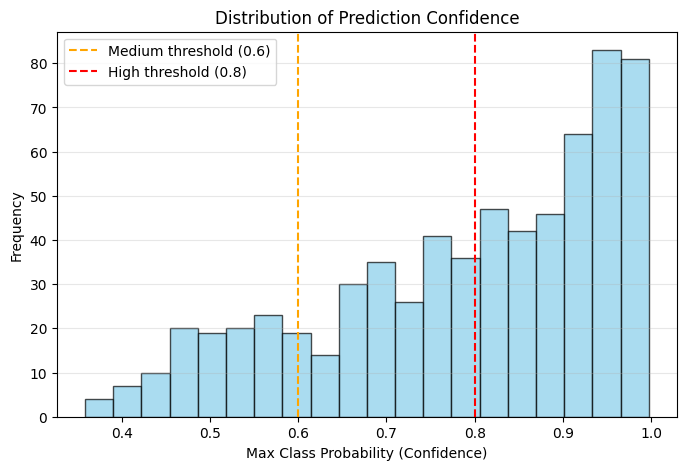

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(confidence, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(0.6, color='orange', linestyle='--', label='Medium threshold (0.6)')
plt.axvline(0.8, color='red', linestyle='--', label='High threshold (0.8)')
plt.title("Distribution of Prediction Confidence")
plt.xlabel("Max Class Probability (Confidence)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()


# **Summary**

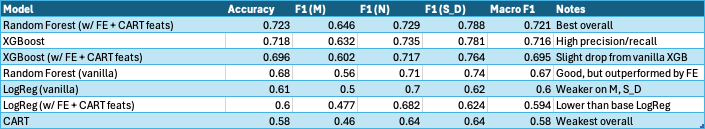

In [ ]:
# -----------------------------
# Get Prediction Probabilities and Confidence
# -----------------------------
y_pred_proba = pipeline_xgb.predict_proba(X_test_fe)  # Shape: (n_samples, 3)
y_pred_encoded = pipeline_xgb.predict(X_test_fe)       # Shape: (n_samples,)

# Get max probability for each prediction (confidence)
confidence = y_pred_proba.max(axis=1)

# Decode labels for reporting
y_pred_labels = le.inverse_transform(y_pred_encoded)
y_test_labels = le.inverse_transform(y_test_encoded)

# Show first few predictions with confidence
import pandas as pd
results = pd.DataFrame({
    'True': y_test_labels,
    'Predicted': y_pred_labels,
    'Confidence': confidence,
    'P_N': y_pred_proba[:, 0],
    'P_M': y_pred_proba[:, 1],
    'P_S_D': y_pred_proba[:, 2]
})

print("Sample Predictions with Confidence:")
print(results.head(10).round(3))
